# Sentiment Classification on SST Dataset with Precision, Recall and F1 Score Evaluation Metric

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive/TSAI_END2/Session7/Assignment1'

/content/gdrive/MyDrive/TSAI_END2/Session7/Assignment1


In [3]:
from nlp_classification_api import *

In [4]:
%cd '../../../../../'

/content


In [5]:
import torch
import spacy
import numpy as np

import random
import math
import time

In [6]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
# !pip install spacy --upgrade

## Building SST Dataset and Model

In [7]:
model_params = {'embedding_dim': 100, 'hidden_dim1': 256, 'hidden_dim2': 128, 'n_layers': 2, 'bidirectional': True, 'dropout': 0.2}
params = {'data_path': 'gdrive/MyDrive/TSAI_END2/Session5/stanfordSentimentTreebank', 'data_name': 'sst', 'model_name': 'basic classification model', 'model_params': model_params, 'seed': SEED, 'batch_size': 128, 'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')}

nlp_pipeline = NLPClassificationPipeline(**params)

Loading data...


.vector_cache/glove.6B.zip: 0.00B [00:00, ?B/s]

Number of training examples: 7900
Number of testing examples: 3386


.vector_cache/glove.6B.zip: 862MB [02:39, 5.40MB/s]                           
100%|█████████▉| 399544/400000 [00:14<00:00, 27474.04it/s]

Unique tokens in source vocabulary: 16388
Unique tokens in target vocabulary: 5
Data is loaded


Loading model...
Model Loaded...
Model Structure:- 
NLPBasicClassifier(
  (embedding): Embedding(16388, 100, padding_idx=1)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (act): Softmax(dim=None)
)
The model has 4,015,253 trainable parameters
Model Built


## Training Model

In [8]:
EPOCHS = 10

train_losses, train_accs, valid_losses, valid_accs, other_metrics = nlp_pipeline.train_model(EPOCHS, 'gdrive/MyDrive/TSAI_END2/Session9','sst_model1','prec_recall_f1')

100%|█████████▉| 399544/400000 [00:29<00:00, 27474.04it/s]

Epoch: 01 | Epoch Time: 0m 1s
	 Train Loss: 1.533 | Train Acc: 29.72%
	 Val. Loss: 1.472 
	 Val Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.2919937074184418 | 0.42320817708969116 | 0.17278215747880085
	 negative | 0.3950299918651581 | 0.5065934062004089 | 0.22195474247856348
	 neutral | nan | 0.0 | nan
	 very positive | 0.37037035822868347 | 0.6410256624221802 | 0.2347417820294538
	 very negative | nan | 0.0 | nan
	 Micro Average F1 Score: 0.17468989958653278
	 Macro Average F1 Score: nan
	 Weighted Average F1 Score: nan
Epoch: 02 | Epoch Time: 0m 1s
	 Train Loss: 1.377 | Train Acc: 38.91%
	 Val. Loss: 1.344 
	 Val Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.389983594417572 | 0.5403867959976196 | 0.22651407143868818
	 negative | 0.3928157687187195 | 0.7450549602508545 | 0.25720789672977007
	 neutral | 0.0 | 0.0 | 0.0
	 very positive | 0.5620437860488892 | 0.42307692766189575 | 0.24137931007187657
	 very negative | 0.

In [9]:
plt.rcParams["figure.figsize"] = (10,10)

## Visualization

	 Evaluation Metric: Precision, Recall, F1
	 Class | Precision | Recall | F1
	 positive | 0.42147117853164673 | 0.48236632347106934 | 0.22493368817608342
	 negative | 0.4451901614665985 | 0.4373626410961151 | 0.22062084471733523
	 neutral | 0.24074074625968933 | 0.3217821717262268 | 0.13771186502373733
	 very positive | 0.5513513684272766 | 0.37362638115882874 | 0.22270742904316226
	 very negative | 0.38562092185020447 | 0.26516854763031006 | 0.15712383893443077
	 Micro Average F1 Score: 0.19772593030124036
	 Macro Average F1 Score: 0.1926195331789498
	 Weighted Average F1 Score: 0.1988935131090743
Confusion Matrix:-


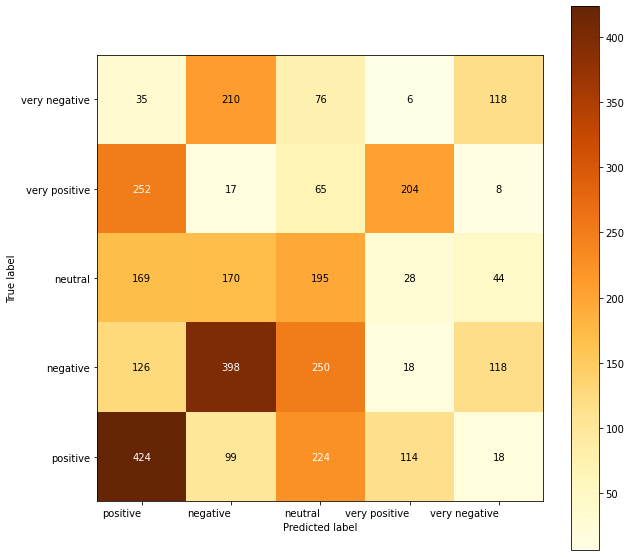

In [10]:
nlp_pipeline.evaluate_model(eval_metric = 'prec_recall_f1')

## Visualization

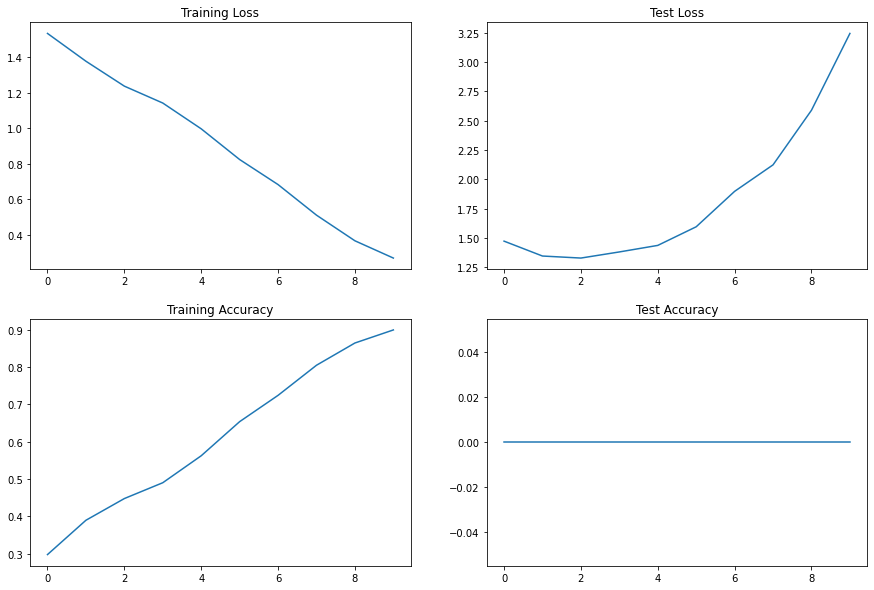

In [11]:
nlp_classification_pipeline.visualize_graph(train_losses, train_accs, valid_losses, valid_accs)

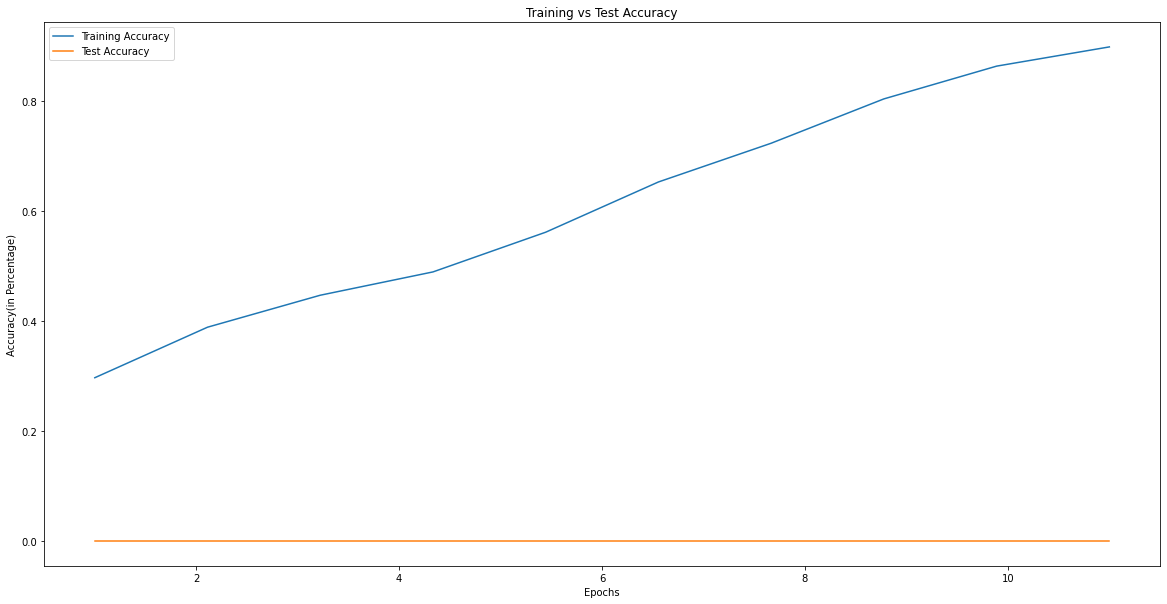

In [12]:
dict_list = {'Training Accuracy': train_accs, 'Test Accuracy': valid_accs}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"
EPOCHS = 10

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

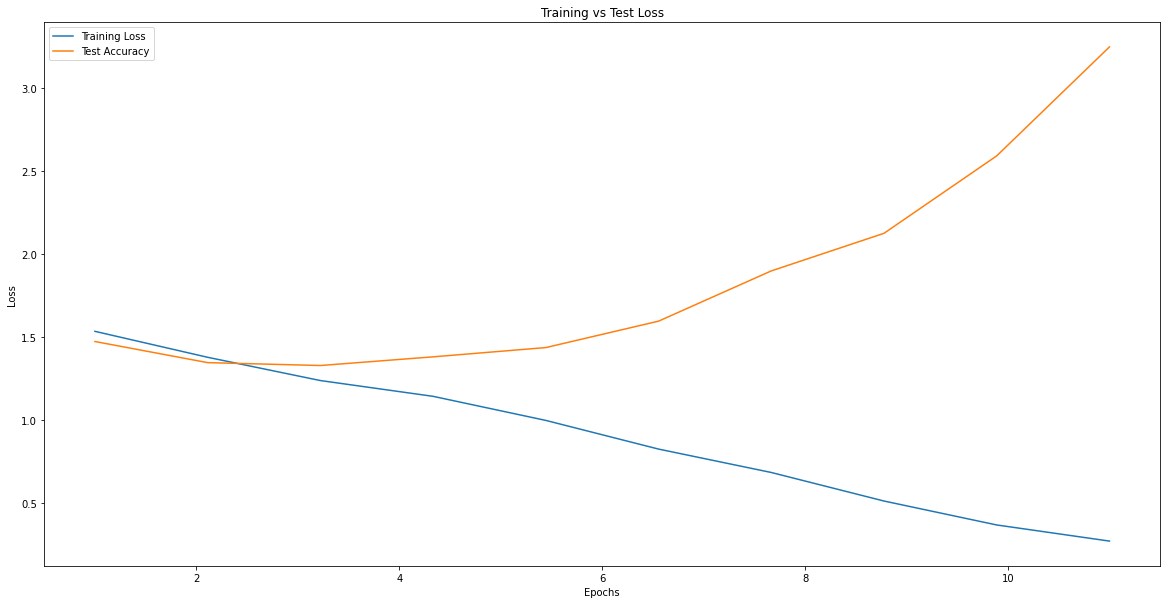

In [13]:
dict_list = {'Training Loss': train_losses, 'Test Accuracy': valid_losses}
title = "Training vs Test Loss"
xlabel = "Epochs"
ylabel = "Loss"
name = "train_vs_test_loss_comparison_graph"

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

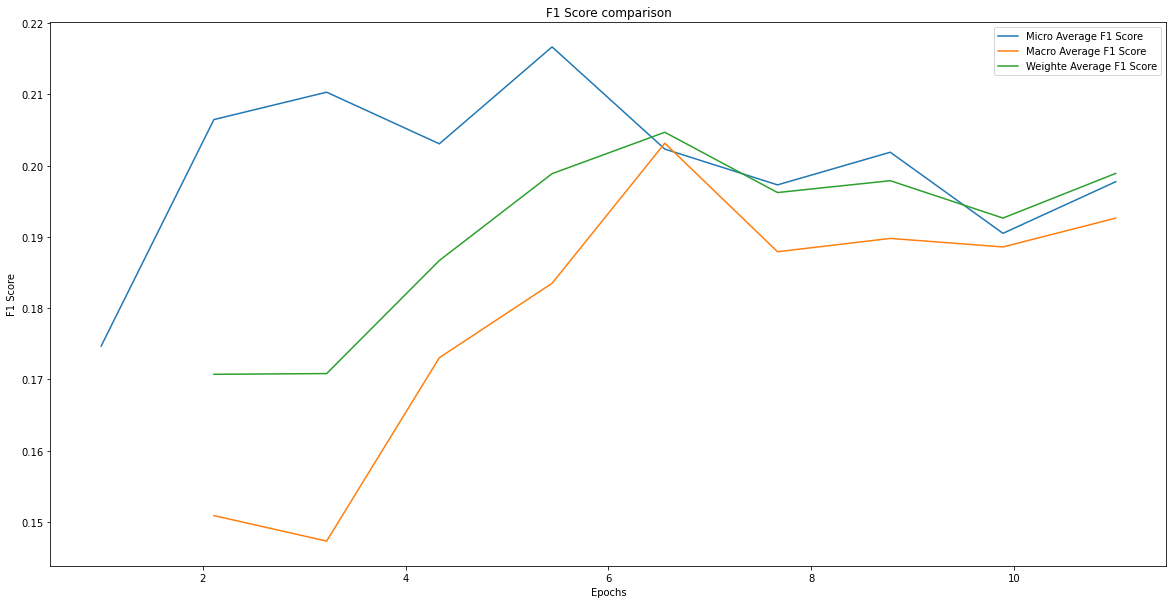

In [14]:
[micro_avg_f1s, macro_f1s, wgt_f1s] = other_metrics
dict_list = {'Micro Average F1 Score': micro_avg_f1s, 'Macro Average F1 Score': macro_f1s, 'Weighte Average F1 Score':wgt_f1s}
title = "F1 Score comparison"
xlabel = "Epochs"
ylabel = "F1 Score"
name = "f1_comparison_graph"
EPOCHS = 10

nlp_classification_pipeline.visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, './', name=name)

## Predictions

In [15]:
nlp_pipeline.get_classified_test_data()

****************************************
***** Correctly Classified Text: *******
****************************************
1) Text: This is a particularly  little  , palatable to only a chosen and very  few .
   Target Sentiment: negative
   Predicted Sentiment: negative

2) Text: ... ` ` Bowling for Columbine '' remains a disquieting and thought - provoking film ...
   Target Sentiment: positive
   Predicted Sentiment: positive

3) Text: Maybe there 's a metaphor here , but figuring it out would n't make Trouble Every Day any better .
   Target Sentiment: negative
   Predicted Sentiment: negative

4) Text:  a vivid imagination and an impressive style that result in some terrific setpieces . 
   Target Sentiment: positive
   Predicted Sentiment: positive

5) Text: Terry is a sort of geriatric Dirty Harry , which will please Eastwood 's  fans -- and suits the story ,  our hero must ride roughshod over incompetent cops to get his man .     
   Target Sentiment: positive
   Predicted Sent

In [16]:
nlp_pipeline.get_classified_test_data(correct=False)

****************************************
***** Incorrectly Classified Text: *******
****************************************
1) Text: a quiet , pure ,  film 
   Target Sentiment: positive
   Predicted Sentiment: very positive

2) Text: At a time when commercialism has squeezed the life out of whatever idealism American moviemaking ever had , Godfrey Reggio 's career shines like a  beacon . 
   Target Sentiment: positive
   Predicted Sentiment: neutral

3) Text: The movie is almost completely lacking in suspense , surprise and consistent emotional conviction . 
   Target Sentiment: very negative
   Predicted Sentiment: neutral

4) Text: The movie is so contrived , nonsensical and formulaic that , come to think of it , the day - old shelf would be a more appropriate  to store it . 
   Target Sentiment: very negative
   Predicted Sentiment: negative

5) Text: It 's lazy for a movie to avoid solving one problem by trying to distract us with the  to another . 
   Target Sentiment: neutral
 